<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/courses/ds4b-m1-1-intro/notebooks/s1-manipilation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this session, you will learn the basic grammar of data manipulation, some best-practice advices. Since data manipulation always follows a purpose and requires some understanding of the data at hand, we will also have a first glance data exploration and visualization. However, we will her only cover the very basics and skip most of the details. Again, you will have a dedicated sessions lateron.

In this session, you will learn:

* A general introduction into Pandas and its functionality
* How to do basic variable filtering, selection, and manipulation
* How to create various types of data summarization
* How to also apply these actions on grouped data
* How to join data from different sources
* How to reshape (pivot) your data

![](https://sds-aau.github.io/SDS-master/00_media/random_data.png)

# Pandas
* Collection of instruments/methods for data processing and analysis
* Fundamental: Two-dimensional (row and column) tabular data (DataFrame)
* Important subtype: Series - one-dimensional data with an index

In [65]:
import pandas as pd
import numpy as np

## Series I
* One-dimensional data
* Data is labeled with an index
* Series consist of pairs (index, data)

In [66]:
import pandas as pd
a = pd.Series([4, 2, 7, 8, 4, 4])
a

0    4
1    2
2    7
3    8
4    4
5    4
dtype: int64

In [67]:
a[2]

7

In [68]:
a*2 + 4

0    12
1     8
2    18
3    20
4    12
5    12
dtype: int64

In [69]:
a.unique()

array([4, 2, 7, 8])

In [70]:
a[2]

7

In [71]:
a.isin([2, 4])

0     True
1     True
2    False
3    False
4     True
5     True
dtype: bool

## Series II
* Indexing using non-integer-based indexing

In [162]:
a = pd.Series([4, 2, 7, 8], index=['Spring', 'Summer', 'Autumn', 'Winter'])
a

Spring    4
Summer    2
Autumn    7
Winter    8
dtype: int64

In [163]:
a['Winter']

8

### Mini-assignment
* Modify the time series
$$(\text{Spring}, 4 ), (\text{Summer}, 2 ), (\text{Autumn}, 7), (\text{Winter}, 8)$$
such that all data is increased by $10$%

Spring    4.4
Summer    2.2
Autumn    7.7
Winter    8.8
dtype: float64

## (If time permits) Date/Time series
* Extensive support for date-/time-type series of data
* Convert times/dates from other external formats
* Create times/dates as `DatetimeIndex`

In [165]:
dti = ['Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018']
dti

['Jan 2018',
 'Feb 2018',
 'Mar 2018',
 'Apr 2018',
 'May 2018',
 'Jun 2018',
 'Jul 2018',
 'Aug 2018',
 'Sep 2018',
 'Oct 2018',
 'Nov 2018',
 'Dec 2018']

In [168]:
dti = pd.to_datetime(dti)
dti

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq=None)

In [75]:
temps_2018 = pd.Series(data=[2.3, -.7, .3, 8.4, 15.0, 16.5, 19.2, 17.5, 14.1, 10.3, 5.9, 4.3], index=dti)
temps_2018

2018-01-01     2.3
2018-02-01    -0.7
2018-03-01     0.3
2018-04-01     8.4
2018-05-01    15.0
2018-06-01    16.5
2018-07-01    19.2
2018-08-01    17.5
2018-09-01    14.1
2018-10-01    10.3
2018-11-01     5.9
2018-12-01     4.3
dtype: float64

In [76]:
dti = pd.date_range(start='Jan 2018', end='Dec 2018', freq='MS')
dti

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

`DatetimeIndex` is the standard object type for storing date/time series. Often used as index for `Series`.

### Mini Assignment

# DataFrame

The Pandas DataFrame is a two-dimensional, size-mutable, and heterogeneous tabular data structure with labeled axes (rows and columns). It is one of the core data structures provided by the Pandas library in Python, tailored for data manipulation and analysis. The DataFrame is designed to handle a variety of data types, including numbers, strings, and even nested data structures like lists and dictionaries.

#### Key Features of Pandas DataFrame:

1. **Labeled Axes**: Each row and column in a DataFrame has a label, making data access and manipulation more intuitive.
2. **Size Mutable**: DataFrames allow for adding and deleting columns or rows, even after the DataFrame is created.
3. **Heterogeneous Data**: Different columns can have different data types. For example, a DataFrame can have a mix of numeric, text, boolean, and other types of columns.
4. **Data Alignment**: Data is aligned by row and column labels, allowing for flexible and easy data operations.
5. **Powerful Methods**: DataFrames come with a plethora of built-in methods to facilitate data wrangling, aggregation, transformation, and visualization.

#### Why is DataFrame Useful?

1. **Flexibility**: The DataFrame can handle a wide variety of data sources, from in-memory data like lists or dictionaries to external data sources like databases, spreadsheets, or even text files.
2. **Data Cleaning**: Pandas provides robust tools for reshaping, merging, aggregating, and filtering data, making the data cleaning process more efficient.
3. **Exploratory Data Analysis (EDA)**: With built-in statistical and visualization methods, DataFrames make EDA a seamless activity.
4. **Integration with Other Libraries**: DataFrame is designed to integrate well with many other libraries in the Python ecosystem, especially those in the data science and machine learning domains, such as NumPy, Scikit-learn, and Matplotlib.
5. **Performance**: Under the hood, Pandas optimizes operations using libraries like NumPy, making DataFrame operations fast and efficient.
6. **Readability**: The tabular structure of a DataFrame, combined with Python's syntax, makes code more readable and data more comprehensible.


In [77]:
data = [['Daniel H.', 40, 'Associate Professor'],
        ['Roman J.', 37, 'Associate Professor'],
        ['Ivan N.', 33, 'Ph.d.-student'],
        ['Hamid B.', 40, 'PostDoc']]
a = pd.DataFrame(data, columns=['Name', 'Age', 'Category'])

In [78]:
a

,Name,Age,Category
0,Daniel H.,40,Associate Professor
1,Roman J.,37,Associate Professor
2,Ivan N.,33,Ph.d.-student
3,Hamid B.,40,PostDoc


In [79]:
a.shape

(4, 3)

In [80]:
a['Name']  #or a.Name

0    Daniel H.
1     Roman J.
2      Ivan N.
3     Hamid B.
Name: Name, dtype: object

## (If time permits) String methods
* Columns with strings can be manipulated as Python strings via `str` attribute

In [81]:
a['Name'].str.upper()

0    DANIEL H.
1     ROMAN J.
2      IVAN N.
3     HAMID B.
Name: Name, dtype: object

In [82]:
a['Name'].str.split(' ')

0    [Daniel, H.]
1     [Roman, J.]
2      [Ivan, N.]
3     [Hamid, B.]
Name: Name, dtype: object

- Contains (in the string) - returns True/False
- Match (starting from the start of the string) - returns True/False
- Extract (returns substrings)

In [83]:
a['Name'].str.contains('[A-Z]a')

0     True
1    False
2    False
3     True
Name: Name, dtype: bool

In [84]:
a['Name'].str.match('[A-Z]a')

0     True
1    False
2    False
3     True
Name: Name, dtype: bool

In [85]:
a['Name'].str.extract('(\w+)\W(\w+)')

,0,1
0,Daniel,H
1,Roman,J
2,Ivan,N
3,Hamid,B


- Regular expressions are a very flexible and compact way of specifying patterns for matching text in more or less specific ways. Can get rather complicated - see `re` [module documentation](https://docs.python.org/3/library/re.html#regular-expression-syntax) and also [Regular Expression HOWTO](https://docs.python.org/3/howto/regex.html#regex-howto).

# Statistics
* First-order

In [86]:
a.mean()

<ipython-input-86-d6ac9701668a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.mean()


Age    37.5
dtype: float64

In [87]:
a.Age.mean()

37.5

In [88]:
a.median()

<ipython-input-88-d799d54f1221>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.median()


Age    38.5
dtype: float64

## Second-order statistics
Pearson correlation coefficient
$$ r_{xy} = \frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n (x_i - \bar x)}\sqrt{\sum_{i=1}^n (yi - \bar y)}}$$

In [89]:
a['Compensation'] = [44000, 66000, 30000, 65000]
a.corr()

<ipython-input-89-5c75c76fd3e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.corr()


,Age,Compensation
Age,1.000000,0.602781
Compensation,0.602781,1.000000


In [90]:
a.cov()

<ipython-input-90-26407a57589e>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.cov()


,Age,Compensation
Age,11.000000,3.483333e+04
Compensation,34833.333333,3.035833e+08


## Not available (na) and Not A Number (NaN)
* Missing data
* Operations not "well-defined"

In [91]:
a['Compensation'] *= pd.Series([1.02, 1.03, 1.04])

In [92]:
a

,Name,Age,Category,Compensation
0,Daniel H.,40,Associate Professor,44880.0
1,Roman J.,37,Associate Professor,67980.0
2,Ivan N.,33,Ph.d.-student,31200.0
3,Hamid B.,40,PostDoc,NaN


In [93]:
b = a.dropna()
b

,Name,Age,Category,Compensation
0,Daniel H.,40,Associate Professor,44880.0
1,Roman J.,37,Associate Professor,67980.0
2,Ivan N.,33,Ph.d.-student,31200.0


In [94]:
a.fillna(0) # Be careful here - mini-asignment!

,Name,Age,Category,Compensation
0,Daniel H.,40,Associate Professor,44880.0
1,Roman J.,37,Associate Professor,67980.0
2,Ivan N.,33,Ph.d.-student,31200.0
3,Hamid B.,40,PostDoc,0.0


In [95]:
# Reset our dataframe
a.loc[3, 'Compensation'] = 65000*1.02

## Mini-assignment
1. Compute the mean compensation with values: a['Compensation'] = [44000, 66000, 30000, 65000]
2. Update compensation: a['Compensation'] *= pd.Series([1.02, 1.02, 1.02])
3. Compute mean compensation - is it increased by 2% ?
4. Update NA values using a.fillna(0, inplace=True)
5. Compute mean compensation - what do you observe? - why?

# Main data manipulation workflows
From my experience, this covers ca. 80% of common data manipulation tasks. These operations are related to 5 central verbs of data/manipulation within the "Structured Query Language" (SQL). While Python/Pandas has for many no direct implementatiions, it is still helpful to think about and describe data operation workflows with them. They are:

1. `filter()` picks cases based on their values.
2. `select()` picks variables based on their names.
3. `arrange()` changes the ordering of the rows.
4. `mutate()` adds new variables that are functions of existing variables
5. `summarise()` reduces multiple values down to a single summary.

These all combine naturally with `group_by()` which allows you to perform any operation "by group".

Sound like fun? Lets get started!

**Note:** Since it is the object we will mostly work with in typical data science projects, this session will focus on working with the pandas dataframe. Will some of the operations will work also on other data objects, many will not or in a different way.

Pandas is a very comprehensive library for data manipulation and analysis

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


## The dataset
We will explore now a bit with the starwars dataset. We uploaded it to our github as a csv, se we can directly load it usin g its url and pandas `read_csv()`
First, let's get an intuition what's in it. `head()` shows us the first 10 rows.

In [96]:
starwars = pd.read_csv("https://sds-aau.github.io/SDS-master/M1/data/characters_starwars.csv")

In [97]:
starwars.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human


In [98]:
starwars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  81 non-null     object 
 4   skin_color  85 non-null     object 
 5   eye_color   84 non-null     object 
 6   birth_year  43 non-null     object 
 7   gender      84 non-null     object 
 8   homeworld   77 non-null     object 
 9   species     82 non-null     object 
dtypes: float64(2), object(8)
memory usage: 6.9+ KB


# Vocabulary of data manipulation

## Filter

![](https://sds-aau.github.io/SDS-master/00_media/dplyr_filter.png)

`Filter()` means to subset a dataframe by rows (observations), meaning the output will filter for only rows which fulfill a certain condition.

In [99]:
# via index
starwars[starwars['species'] == 'Droid']

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,NaN,Tatooine,Droid
21,IG-88,200.0,140.0,none,metal,red,15BBY,none,NaN,Droid
84,BB8,NaN,NaN,none,none,black,NaN,none,NaN,Droid


In [100]:
# or "Query style" (There are always many ways of doing the same thing)
starwars.query('species == "Droid" & homeworld == "Tatooine"')

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,NaN,Tatooine,Droid


## Select

![](https://sds-aau.github.io/SDS-master/00_media/dplyr_select.png)

`select()` means to subset a dataframe by column (variable), meaning the output will only contain certain columns in the stated order

In [101]:
# positive selection
df_select = starwars[['name','homeworld']]
df_select.head()

,name,homeworld
0,Luke Skywalker,Tatooine
1,C-3PO,Tatooine
2,R2-D2,Naboo
3,Darth Vader,Tatooine
4,Leia Organa,Alderaan


In [102]:
# Negative selection (drop)
df_select = starwars.drop(['birth_year','skin_color'], axis=1)
df_select.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human


In [103]:
# Conditional selection
col_columns = [x for x in starwars.columns if x.endswith('color')]
df_select = starwars[['name'] + col_columns]
df_select.head()

,name,hair_color,skin_color,eye_color
0,Luke Skywalker,blond,fair,blue
1,C-3PO,NaN,gold,yellow
2,R2-D2,NaN,"white, blue",red
3,Darth Vader,none,white,yellow
4,Leia Organa,brown,light,brown


# Arrange

![](https://sds-aau.github.io/SDS-master/00_media/dplyr_arrange.png)

`arrange()` defines the way the rows of your dataframe are ordered

In [104]:
# arrange in python is sort_values homeworld-ascending, mass-descending
df_arrange = starwars.sort_values(by=['homeworld', 'mass'], ascending=[True, False])
df_arrange.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
78,Raymus Antilles,188.0,79.0,brown,light,brown,NaN,male,Alderaan,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human
64,Bail Prestor Organa,191.0,NaN,black,tan,brown,67BBY,male,Alderaan,Human
71,Ratts Tyerell,79.0,15.0,none,"grey, blue",NaN,NaN,male,Aleen Minor,Aleena
24,Lobot,175.0,79.0,none,light,blue,37BBY,male,Bespin,Human


## Mutate

![](https://sds-aau.github.io/SDS-master/00_media/dplyr_mutate.png)

`mutate()` means to manipulate existing variables or create new ones. Here, depending on the type of manipulation, Python/Pandas has many alternatives.

Lets start with the simplest: Lets say we want to calculate the starwars characters body mass index (BMI), which is $BMI = {weight}/{height}^2$

In [105]:
# easy!
starwars['bmi'] = starwars['mass'] / (starwars['height'] /100)**2

In [106]:
# Complicated but good for more complex stuff
# We can also use apply (rowwise itration) with so-called lambda functions (anonymous fuctions). They have a strange syntax but are very practical for a variety of tasks.

starwars['bmi'] = starwars.apply(lambda x: x['mass']/(x['height'] / 100)**2, axis=1) #x is here one row of the DF

# Summarize

![](https://sds-aau.github.io/SDS-master/00_media/dplyr_summarize.png){
  
`summarize()` operations reduces your dataset to one observation, which is summarized according to a defined function.

In [107]:
print(starwars['height'].min())
print(starwars['height'].mean())
print(starwars['height'].max())
print(starwars['height'].std())

66.0
174.35802469135803
264.0
34.77042875849222


## (+1) group_by

![](https://sds-aau.github.io/SDS-master/00_media/dplyr_group.png)

Finally, `by_group()` is offers the perfect complement to the 5 basic verbs, since it allows to perform aqll the above mentioned tasks sepperate according to used-defined groupings in one or multiple categories. Lets look at some examples:

First of all, it works amazingly well with the `summarize()` verb, producing within group summaries[link text](https://)

In [108]:
starwars.groupby(by='homeworld')['height'].mean().sort_values(ascending=False).head(10)

homeworld
Quermia        264.000000
Kashyyyk       231.000000
Kalee          216.000000
Kamino         208.333333
Utapau         206.000000
Ojom           198.000000
Cerea          198.000000
Glee Anselm    196.000000
Champala       196.000000
Serenno        193.000000
Name: height, dtype: float64

## (+2) Two-Table Verbs

![](https://sds-aau.github.io/SDS-master/00_media/join-setup2.png)

It's rare that a data analysis involves only a single table of data. In practice, you'll normally have many tables that contribute to an analysis, and you need flexible tools to combine them. There are three families of verbs that work with two tables at a time:

1. Mutating joins, which add new variables to one table from matching rows in another.
2. Filtering joins, which filter observations from one table based on whether or not they match an observation in the other table.
3. Set operations, which combine the observations in the data sets as if they were set elements.

![](https://sds-aau.github.io/SDS-master/00_media/join-outer.png)

Among those, mutating joins are the by far most used ones, so we will briefly discuss them here, and cover other types later in the applied part. Mutating joins allow you to combine variables from multiple tables (merging data).

I could go through it on my own, but instead will refer to the excellent introduction in [Python for Data Science Handbook (VanderPlas, 2016), Chapter 3.08](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

# Case Study: Cleaning up historical data on voting of the United Nations General Assembly

So, after we refreshed the basic grammar of data-manipulation, we will put it to a test in the following example. We will step-by-step explore the power of the basic grammar of data-manipulation.

We will use the "UN General Assembly Voting" dataset, and explore the pattern and some underlying mechanisms of country voting choices. Lets get started!


Source: Erik Voeten "Data and Analyses of Voting in the UN General Assembly" Routledge Handbook of International Organization, edited by Bob Reinalda (published May 27, 2013). Available at SSRN: http://ssrn.com/abstract=2111149


## Step 1: Optaining the deta
Usually, we would now have to download some data online, access it via an API or a local database, or something like that. The full dataset is available at [Harvard's DataVerse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12379).  For a first warm up, we will skip this part, and use the following data I conveniently prepared for you.

In [109]:
# data is saved as parquet, a nice and lightweight format to save dataframes
votes = pd.read_parquet("https://sds-aau.github.io/SDS-master/M1/data/votes.pq")


## Step 2: First Inspection

Lets first have a look what's in the dataset

In [110]:
votes.head()

,rcid,session,vote,ccode
1,46,2,1,2
2,46,2,1,20
3,46,2,9,31
4,46,2,1,40
5,46,2,1,41


In [111]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508929 entries, 1 to 508929
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   rcid     508929 non-null  int64
 1   session  508929 non-null  int64
 2   vote     508929 non-null  int64
 3   ccode    508929 non-null  int64
dtypes: int64(4)
memory usage: 19.4 MB


We see that the dataset is with 508,929 observations already somewhat large. We find a set of 4 variables. Doesn't sound so exiting on first glance. Anyhow, lets talk for a moment about the variables we have:

* **`rcid:`** The roll-call ID, serving as an unique identifyer for the resolution vouted on.
* **`session:`** The number of the session of the annual UNGA, starting with 1 for the historically first meeting
* **`vote:`** A numerical code representing the country's choice of vote:
     * 1 = Yes
     * 2 = Abstain
     * 3 = No
     * 8 = Not present
     * 9 = Not a member
* **`ccode:`** A numerical code to identify the country

So, to sum up:

* Every row contains a voting choice for a particular resolution on country level.
* Consequently, we will for every resulution have a single row for every country.
* All variables are coded numerically

## Step 3: Preprocessing

Whatever data you obtian, it usually needs a bit of manual "massage" to be ready for further analysis. Common steps here are

1. Check variable format (dates, strings, numeric etc.)
2. Check variable scaling (range, outliers)
3. Deal with missing values

While there are some more issues you could run into, we in the following go through a couple of common problems and see some easy ways how to solve them.

### Filtering
One step of data cleaning is removing observations (rows) that you're not interested in. In this case, you want to remove "Not present" and "Not a member". Since we are for now not interested in them, lets get rid of them

In [112]:
votes = votes[votes['vote'] <= 3]

### Adding a year column
The next step of data cleaning is manipulating your variables (columns) to make them more informative. In this case, you have a session column that is hard to interpret intuitively. But since the UN started voting in 1946, and holds one session per year, you can get the year of a UN resolution by adding 1945 to the session number.

In [113]:
votes['year'] = votes['session'] + 1945

<ipython-input-113-545909afbd59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votes['year'] = votes['session'] + 1945


### Adding a country column
The country codes in the ccode column are what's called [Correlates of War codes](http://cow.dss.ucdavis.edu/data-sets/cow-country-codes), a numerical coding convention for country names. This isn't ideal for an analysis, since you'd like to work with recognizable country names.

For this and similar cases, the package `countrycode` is really practical, since it allows for fast and easy ways to switch between many standard country-coding conventions. Since it is not by default installed on colab, we need to dom so first.

In [114]:
!pip install countrycode

In [115]:
from countrycode import countrycode

The package is a bit slow and thus perhaps it is easier to speed up things by transforming only the unique country-codes and then just merge them back

In [116]:
unique_countrycodes = votes.ccode.unique().tolist()
uniques_countries = countrycode(unique_countrycodes, origin='cown', destination='country.name')

In [117]:
lookup_df = pd.DataFrame({'ccode' : unique_countrycodes,
                          'country_name': uniques_countries})

lookup_df.head()

,ccode,country_name
0,2,United States
1,20,Canada
2,40,Cuba
3,41,Haiti
4,42,Dominican Republic


In [118]:
#adding the countries to the initial data
votes = votes.merge(lookup_df, how='left')

In [119]:
votes.reset_index(drop=True,inplace=True)

In [120]:
votes.head()

,rcid,session,vote,ccode,year,country_name
0,46,2,1,2,1947,United States
1,46,2,1,20,1947,Canada
2,46,2,1,40,1947,Cuba
3,46,2,1,41,1947,Haiti
4,46,2,1,42,1947,Dominican Republic


In [121]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353547 entries, 0 to 353546
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   rcid          353547 non-null  int64 
 1   session       353547 non-null  int64 
 2   vote          353547 non-null  int64 
 3   ccode         353547 non-null  int64 
 4   year          353547 non-null  int64 
 5   country_name  352472 non-null  object
dtypes: int64(5), object(1)
memory usage: 16.2+ MB


## 4.4 Generating first insights
In this analysis, we're going to focus on "% of votes that are yes" as a metric for the "agreeableness" of countries. we'll start by finding this summary for the entire dataset: the fraction of all votes in their history that were "yes". Note that within your call to `summarize()`, you can use `n()` to find the total number of votes and `mean(vote == 1)` (since the output of the logical operation is FALSE or TRUE, which is equivalent to 0 or 1) to find the fraction of "yes" votes.

In [122]:
len(votes[votes.vote == 1]) / len(votes)

0.7999247624785389

In [123]:
# Using nice built in stuff
votes.vote.value_counts(normalize=True)

1    0.799925
2    0.128532
3    0.071544
Name: vote, dtype: float64

In [124]:
votes.groupby('year')['vote'].value_counts(normalize=True)

year  vote
1947  1       0.569397
      3       0.293771
      2       0.136832
1949  1       0.437590
      3       0.325742
                ...   
2011  2       0.109404
      3       0.079542
2013  1       0.807042
      2       0.114994
      3       0.077964
Name: vote, Length: 102, dtype: float64

The rest of this section has ben covered in many assignments and the python EDA lecture

In [125]:
!wget https://github.com/SDS-AAU/SDS-master/blob/master/00_data/UN_votes_descriptions.rds?raw=true

--2023-09-04 11:03:56--  https://github.com/SDS-AAU/SDS-master/blob/master/00_data/UN_votes_descriptions.rds?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SDS-AAU/SDS-master/raw/master/00_data/UN_votes_descriptions.rds [following]
--2023-09-04 11:03:56--  https://github.com/SDS-AAU/SDS-master/raw/master/00_data/UN_votes_descriptions.rds
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/UN_votes_descriptions.rds [following]
--2023-09-04 11:03:56--  https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/UN_votes_descriptions.rds
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.

In [126]:
!pip install pyreadr

In [127]:
import pyreadr

In [128]:
result = pyreadr.read_r('UN_votes_descriptions.rds?raw=true.1')
result

OrderedDict([(None,
                      rcid  session       date      unres   me   nu   di   hr   co   ec
              0       46.0      2.0 1947-09-04    R/2/299  0.0  0.0  0.0  0.0  0.0  0.0
              1       47.0      2.0 1947-10-05    R/2/355  0.0  0.0  0.0  1.0  0.0  0.0
              2       48.0      2.0 1947-10-06    R/2/461  0.0  0.0  0.0  0.0  0.0  0.0
              3       49.0      2.0 1947-10-06    R/2/463  0.0  0.0  0.0  0.0  0.0  0.0
              4       50.0      2.0 1947-10-06    R/2/465  0.0  0.0  0.0  0.0  0.0  0.0
              ...      ...      ...        ...        ...  ...  ...  ...  ...  ...  ...
              2584  9052.0     22.0 1967-07-02  ESS/5/101  1.0  0.0  0.0  0.0  0.0  0.0
              2585  9053.0     22.0 1967-07-02  ESS/5/102  1.0  0.0  0.0  0.0  0.0  0.0
              2586  9054.0     22.0 1967-07-05   ESS/5/41  1.0  0.0  0.0  0.0  0.0  0.0
              2587  9055.0     22.0 1967-07-05   ESS/5/97  0.0  0.0  0.0  0.0  0.0  0.0
            

In [129]:
descriptions = result[None]

In [130]:
descriptions['year'] = pd.to_datetime(descriptions.date).dt.year

In [147]:
votes_joined = votes.merge(descriptions, how='inner')
votes_joined.drop(['ccode','date','session','unres'], axis=1, inplace=True)
votes_joined.head()

,rcid,vote,year,country_name,me,nu,di,hr,co,ec
0,46,1,1947,United States,0.0,0.0,0.0,0.0,0.0,0.0
1,46,1,1947,Canada,0.0,0.0,0.0,0.0,0.0,0.0
2,46,1,1947,Cuba,0.0,0.0,0.0,0.0,0.0,0.0
3,46,1,1947,Haiti,0.0,0.0,0.0,0.0,0.0,0.0
4,46,1,1947,Dominican Republic,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
us_col_perc = votes_joined[(votes_joined.country_name == 'Denmark')].groupby('year')['vote'].value_counts(normalize=True)

<Axes: xlabel='year'>

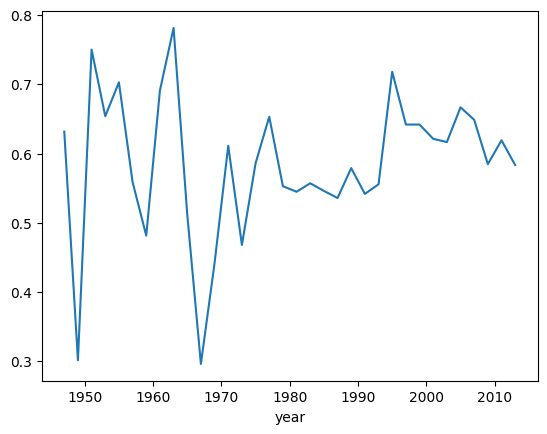

In [150]:
us_col_perc.loc[:,1].plot()

In [151]:
countries = ["United States", "China", "France", "Denmark"]

#countries = [country.upper() for country in countries] # Upper casing
#print(countries) # just display - no function

votes_joined[votes_joined['country_name'].isin(countries)].head()

,rcid,vote,year,country_name,me,nu,di,hr,co,ec
0,46,1,1947,United States,0.0,0.0,0.0,0.0,0.0,0.0
25,46,1,1947,France,0.0,0.0,0.0,0.0,0.0,0.0
35,46,1,1947,Denmark,0.0,0.0,0.0,0.0,0.0,0.0
54,47,1,1947,United States,0.0,0.0,0.0,1.0,0.0,0.0
79,47,1,1947,France,0.0,0.0,0.0,1.0,0.0,0.0


In [154]:
# Yes some seaborne plotting
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [155]:
countries_perc_yes = votes_joined[votes_joined['country_name'].isin(countries) ].groupby(['year', 'country_name'])['vote'].value_counts(normalize=True)


<Axes: xlabel='year'>

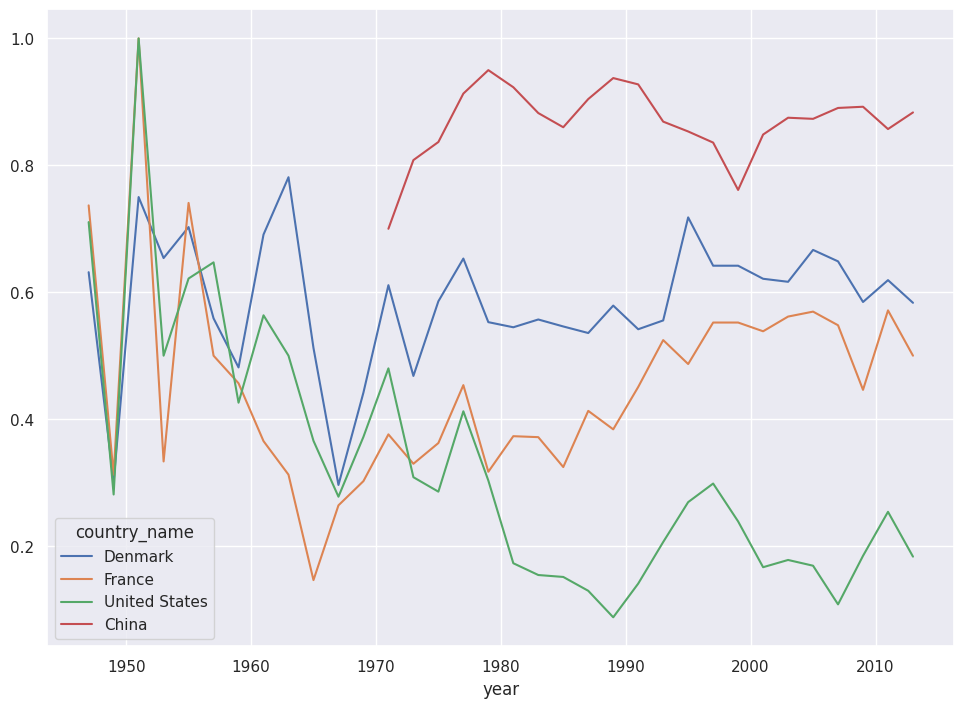

In [156]:
to_plot = countries_perc_yes.loc[:,:,1]

sns.lineplot(x = to_plot.index.get_level_values(0), y = to_plot.values, hue = to_plot.index.get_level_values(1))

# Summary

Today, I guess the main take-aways are:

* Ca. 80% of data operations in structured data can be broken down into a handful of operations.
* Singe-table operations alter, filter, select, or change the shape of a dataframe.
* Multi-Table operations combine information from different datarames.
* Mutting joings can be distinguished in inner and outer joins

# Further studies

## Recommended DataCamp courses
* [Introduction to Python](https://app.datacamp.com/learn/courses/intro-to-python-for-data-science)
* [Intermediate Python](https://app.datacamp.com/learn/courses/intermediate-python)
